In [16]:
#Insert dataset
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import h5py
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization,concatenate, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from emg import EMG_filter

def get_files_in_directory(path, extension):
    os.chdir(path)
    result = glob.glob('*.{}'.format(extension))
    result.sort() # Ensure correct order of files
    return result
def array_from_csv(file):
    list_arr = pd.read_csv(file, sep=',', header=0,skiprows=2).values
    return list_arr
list_files = get_files_in_directory('C:/Users/Administrator/Desktop/MyoFile/right_hand2/', 'csv')
print(list_files)


['fist1.csv', 'fist2.csv', 'fist3.csv', 'fist4.csv', 'fist5.csv', 'fist6.csv', 'forefinger1.csv', 'forefinger2.csv', 'forefinger3.csv', 'forefinger4.csv', 'forefinger5.csv', 'forefinger6.csv', 'forefinger7.csv', 'forefinger8.csv', 'forefinger9.csv', 'indexfinger1.csv', 'indexfinger2.csv', 'indexfinger3.csv', 'indexfinger4.csv', 'indexfinger5.csv', 'indexfinger6.csv', 'indexfinger7.csv', 'indexfinger8.csv', 'indexfinger9.csv', 'littlefinger1.csv', 'littlefinger2.csv', 'littlefinger3.csv', 'littlefinger4.csv', 'littlefinger5.csv', 'littlefinger6.csv', 'littlefinger7.csv', 'littlefinger8.csv', 'middlefinger1.csv', 'middlefinger2.csv', 'middlefinger3.csv', 'middlefinger4.csv', 'middlefinger5.csv', 'middlefinger6.csv', 'middlefinger7.csv', 'middlefinger8.csv', 'middlefinger9.csv', 'thumb1.csv', 'thumb2.csv', 'thumb3.csv', 'thumb4.csv', 'thumb5.csv', 'thumb6.csv']


In [17]:
#Insert dataset, 截取, add label
interval = 100
data = []
label = []
for file in list_files:
    dataset = array_from_csv(file)
    #emg = dataset[100:,0:3]
    emg = dataset[100:, 3:6]
    #emg2 = dataset[100:,2]
    #截取数据
    for j in range(0,len(emg)-len(emg)%interval,interval):
        sample=[]
        for i in range(interval):
            channel = []
            channel.append(emg[j+i][0])
            channel.append(emg[j+i][1])
            channel.append(emg[j+i][2])
            sample.append(channel)
        for i in range(120-interval):
            sample.append([0,0,0])
        data.append(sample)
        if("thumb" in file):
            label.append(0)
        elif("forefinger" in file):
            label.append(1)
        elif("middlefinger" in file):
            label.append(2)
        elif("indexfinger" in file):
            label.append(3)
        elif("littlefinger" in file):
            label.append(4)
        elif("fist" in file):
            label.append(5)
data = np.asarray(data)
label = np.asarray(label)
print(data.shape)
print(label.shape)        
                

(544, 120, 3)
(544,)


In [18]:
def convert_to_one_hot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
#随机打乱数据和标签
N = data.shape[0]
index = np.random.permutation(N)
data = data[index,:,:]
label = label[index]

#对数据升维，标签one-hot
data = np.expand_dims(data,axis=3)
label = convert_to_one_hot(label,6).T
#划分数据集
N = data.shape[0]
num_train = round(N*0.8)
X_train = data[0:num_train,:,:,:]
Y_train = label[0:num_train,:]
X_test = data[num_train:N,:,:,:]
Y_test = label[num_train:N,:]

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print(Y_test)

X_train shape: (435, 120, 3, 1)
Y_train shape: (435, 6)
X_test shape: (109, 120, 3, 1)
Y_test shape: (109, 6)
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 

In [19]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [20]:
def CNN(input_shape=(120,3,1), classes=6): 
    X_input = Input(input_shape)
    
    X = Conv2D(filters=32, kernel_size=(20,3), strides=(1,1), activation='relu', padding='same')(X_input)
    X = MaxPooling2D((20,1))(X)

    X = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(X)
    X = MaxPooling2D((2,1),)(X)
    
    X = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu',padding='valid')(X)
    
    X = Flatten(name='flatten')(X)
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
#model = CNN()
#model.summary()

In [21]:
def ML_CNN(input_shape=(120,3,1), classes=6): 
    X_input = Input(input_shape)
    
    f1 = [20, 16, 12, 8]
    f2 = [3, 4, 5, 6]
    convs = []
    
    for i in range(4):
        x = Conv2D(filters=32, kernel_size=(f1[i],3),strides=(1,1), activation='relu',padding='valid')(X_input)
        x = MaxPooling2D((20,1),padding="SAME")(x)
        
        x = Conv2D(filters=64, kernel_size=(f2[i],1), strides=(1,1), activation='relu', padding='valid')(x)
        x = MaxPooling2D((9-2-i,1),padding="SAME")(x)
        
        x = Flatten()(x)
        convs.append(x)
        
    merge = concatenate(convs,axis=1)
    X = merge
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
model = ML_CNN()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 120, 3, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 101, 1, 32)   1952        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 105, 1, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 109, 1, 32)   1184        input_3[0][0]                    
____________________________________________________________________________________________

In [22]:
#训练原始数据
import time
start = time.time()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = LossHistory() # 创建一个history实例
model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test),batch_size=32,callbacks=[history])

preds_train = model.evaluate(X_train, Y_train)
print("Train Loss = " + str(preds_train[0]))
print("Train Accuracy = " + str(preds_train[1]))

preds_test  = model.evaluate(X_test, Y_test)
print("Test Loss = " + str(preds_test[0]))
print("Test Accuracy = " + str(preds_test[1]))
end = time.time()
print("time:",end-start)

#保存模型
model.save('meg_model.h5')

Epoch 1/200
14/14 [==============================] - 1s 16ms/step - loss: 33.5670 - accuracy: 0.1972 - val_loss: 2.7972 - val_accuracy: 0.5229
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 10.5203 - accuracy: 0.2905 - val_loss: 1.6635 - val_accuracy: 0.5963
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 6.4142 - accuracy: 0.3360 - val_loss: 1.0126 - val_accuracy: 0.6514
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 4.1322 - accuracy: 0.3749 - val_loss: 0.8533 - val_accuracy: 0.6789
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 2.9960 - accuracy: 0.3875 - val_loss: 0.9357 - val_accuracy: 0.6881
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 2.9699 - accuracy: 0.3944 - val_loss: 0.8552 - val_accuracy: 0.6606
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 2.0483 - accuracy: 0.5120 - val_loss: 0.8103 - val_accuracy: 0.6972
Epoch 8/20

Epoch 59/200
14/14 [==============================] - 0s 7ms/step - loss: 0.5463 - accuracy: 0.7997 - val_loss: 0.3255 - val_accuracy: 0.8624
Epoch 60/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5206 - accuracy: 0.7910 - val_loss: 0.3154 - val_accuracy: 0.8716
Epoch 61/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4340 - accuracy: 0.8369 - val_loss: 0.3074 - val_accuracy: 0.8899
Epoch 62/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.8433 - val_loss: 0.3439 - val_accuracy: 0.8440
Epoch 63/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.8145 - val_loss: 0.2989 - val_accuracy: 0.8532
Epoch 64/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5052 - accuracy: 0.7916 - val_loss: 0.3117 - val_accuracy: 0.8716
Epoch 65/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4630 - accuracy: 0.8415 - val_loss: 0.3404 - val_accuracy: 0.8716
Epoch 

14/14 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.9046 - val_loss: 0.3096 - val_accuracy: 0.8899
Epoch 117/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1656 - accuracy: 0.9484 - val_loss: 0.2842 - val_accuracy: 0.9266
Epoch 118/200
14/14 [==============================] - 0s 6ms/step - loss: 0.2220 - accuracy: 0.9198 - val_loss: 0.2557 - val_accuracy: 0.9266
Epoch 119/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9464 - val_loss: 0.2980 - val_accuracy: 0.8991
Epoch 120/200
14/14 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.9350 - val_loss: 0.2958 - val_accuracy: 0.8991
Epoch 121/200
14/14 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.9069 - val_loss: 0.3051 - val_accuracy: 0.9266
Epoch 122/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1165 - accuracy: 0.9656 - val_loss: 0.2946 - val_accuracy: 0.9083
Epoch 123/200

14/14 [==============================] - 0s 6ms/step - loss: 0.1085 - accuracy: 0.9762 - val_loss: 0.3195 - val_accuracy: 0.8991
Epoch 174/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1937 - accuracy: 0.9403 - val_loss: 0.2229 - val_accuracy: 0.9266
Epoch 175/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1364 - accuracy: 0.9538 - val_loss: 0.2503 - val_accuracy: 0.9174
Epoch 176/200
14/14 [==============================] - 0s 6ms/step - loss: 0.1350 - accuracy: 0.9527 - val_loss: 0.3066 - val_accuracy: 0.9174
Epoch 177/200
14/14 [==============================] - ETA: 0s - loss: 0.1614 - accuracy: 0.96 - 0s 6ms/step - loss: 0.1356 - accuracy: 0.9648 - val_loss: 0.3017 - val_accuracy: 0.9083
Epoch 178/200
14/14 [==============================] - 0s 11ms/step - loss: 0.1682 - accuracy: 0.9566 - val_loss: 0.3144 - val_accuracy: 0.8991
Epoch 179/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3633 - accuracy: 0.9354 - val_loss: 

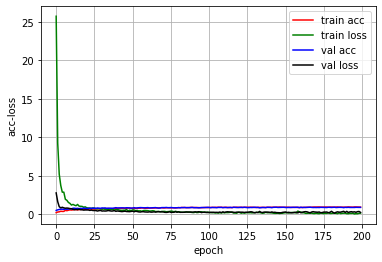

In [23]:
history.loss_plot('epoch')